<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

Kelompok KAS-dad


## Deskripsi Dataset Spesifikasi Motor

* `Model` : Nama brand dan model dari motor
* `Tahun` : Tahun motor diproduksi
* `Rating` : Rating motor
* `Power` : Output power maksimum dalam Horsepower (HP)
* `Kapasitas Bahan Bakar` : Kapasitas Bahan Bakar Maksimum dalam Liter (Liter)
* `Jarak Sumbu Roda` : Jarak antara ban depan dan ban belakang dalam milimiter (mm)
* `Ketinggian Tempat Duduk` : Ketinggian tempat duduk dari bawah tempat duduk hingga dasar dalam milimeter (mm)
* `Bore` : Diameter silinder piston dalam milimeter (mm)
* `Stroke` : Jarak silinder piston bergerak dalam milimeter (mm)
* `Jenis Mesin` : Jenis mesin yang digunakan oleh motor
* `Jenis Bahan Bakar` : Jenis bahan bakar yang digunakan oleh motor
* `Jenis Sistem Pendingin` : Jenis sistem pendingin yang digunakan oleh motor
* `Gearbox` : Banyaknya gear dalam gearbox.
* `Jenis Transmisi` : Jenis transmisi yang digunakan oleh motor
* `Suspensi Depan` : Jenis dan konfigurasi suspensi bagian depan
* `Suspensi Belakang` : Jenis dan konfigurasi suspensi bagian belakang
* `Kompresi` : Rasio kompresi yang digunakan oleh motor
* `Ban Depan` : Jenis dan ukuran yang digunakan oleh ban depan
* `Ban Belakang` : Jenis dan ukuran yang digunakan oleh ban belakang
* `Rem Depan` : Jenis rem depan yang digunakan
* `Rem Belakang` : Jenis rem belakang yang digunakan
* `Warna` : Warna yang digunakan pada motor
* `Starter` : Jenis starter yang digunakan untuk menyalakan motor
* `Kapasitas Mesin` : Ukuran kapasitas mesin dalam centimeter cubic (cc)
* `Kategori` : Kategori motor

In [642]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import tree

In [643]:
df = pd.read_csv('SM_train.csv')

In [644]:
df_test = pd.read_csv('SM_test.csv')

In [645]:
print("Jumlah baris : ", df.shape[0])
print("Jumlah kolom : ", df.shape[1])

Jumlah baris :  29966
Jumlah kolom :  26


In [646]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29966 entries, 0 to 29965
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       29966 non-null  int64  
 1   Model                    29966 non-null  object 
 2   Tahun                    29966 non-null  int64  
 3   Rating                   29966 non-null  float64
 4   Power                    29966 non-null  float64
 5   Kapasitas Bahan Bakar    29966 non-null  float64
 6   Jarak Sumbu Roda         29966 non-null  float64
 7   Ketinggian Tempat Duduk  29966 non-null  float64
 8   Bore                     29966 non-null  float64
 9   Stroke                   29966 non-null  float64
 10  Jenis Mesin              29966 non-null  object 
 11  Jenis Bahan Bakar        29966 non-null  object 
 12  Jenis Sistem Pendingin   29966 non-null  object 
 13  Gearbox                  29966 non-null  object 
 14  Jenis Transmisi       

In [647]:
df.rename(columns={'Id': 'ID'}, inplace=True)

In [648]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7492 entries, 0 to 7491
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               7492 non-null   int64  
 1   ID                       7492 non-null   int64  
 2   Model                    7492 non-null   object 
 3   Tahun                    7492 non-null   int64  
 4   Rating                   7492 non-null   float64
 5   Power                    7492 non-null   float64
 6   Kapasitas Bahan Bakar    7492 non-null   float64
 7   Jarak Sumbu Roda         7492 non-null   int64  
 8   Ketinggian Tempat Duduk  7492 non-null   int64  
 9   Bore                     7492 non-null   float64
 10  Stroke                   7492 non-null   float64
 11  Jenis Mesin              7492 non-null   object 
 12  Jenis Bahan Bakar        7492 non-null   object 
 13  Jenis Sistem Pendingin   7492 non-null   object 
 14  Gearbox                 

In [649]:
df_test.drop(columns=['Unnamed: 0'], inplace=True)

In [650]:
 df.head(5)[['ID', 'Model', 'Tahun', 'Rating', 'Power','Kapasitas Bahan Bakar','Jarak Sumbu Roda','Ketinggian Tempat Duduk','Bore','Stroke','Jenis Mesin','Jenis Bahan Bakar','Jenis Sistem Pendingin']]


,ID,Model,Tahun,Rating,Power,Kapasitas Bahan Bakar,Jarak Sumbu Roda,Ketinggian Tempat Duduk,Bore,Stroke,Jenis Mesin,Jenis Bahan Bakar,Jenis Sistem Pendingin
0,345,Adiva Birdie,2012,2.2,9.4,5.0,1400.0,800.0,54.0,66.0,"Single cylinder, four-stroke",Carburettor,Air
1,35956,Yamaha SZR 660,1997,3.7,48.0,17.0,1400.0,690.0,54.0,66.0,"Single cylinder, four-stroke",Carburettor,Liquid
2,23521,Modenas Kriss 100,2011,3.0,27.0,4.3,1400.0,800.0,50.0,49.5,"Single cylinder, four-stroke",Carburettor. Keihin PB18X1,Air
3,32412,Triumph Speed Twin,1956,3.5,27.0,17.0,1400.0,800.0,54.0,66.0,"Twin, four-stroke",Carburettor. Amal,Air
4,31061,Sym Mio 100 (Disk Type),2007,2.8,27.0,4.8,1220.0,800.0,54.0,66.0,"Single cylinder, four-stroke",Carburettor,Air


In [651]:
df.head(5)[['Gearbox', 'Jenis Transmisi', 'Suspensi Depan', 'Suspensi Belakang', 'Kompresi','Ban Depan','Ban Belakang','Rem Depan','Rem Belakang','Warna','Starter','Kapasitas Mesin','Kategori']]


,Gearbox,Jenis Transmisi,Suspensi Depan,Suspensi Belakang,Kompresi,Ban Depan,Ban Belakang,Rem Depan,Rem Belakang,Warna,Starter,Kapasitas Mesin,Kategori
0,6-speed,Chain (final drive),Telescopic fork,Monoshock,9.5:1,3.50-10,3.50-10,Expanding brake (drum brake),Expanding brake (drum brake),Red/white,Electric,124.6,Classic
1,5-speed,Chain (final drive),Telescopic fork,Monoshock,9.5:1,120/70-ZR17,180/55-ZR17,Single disc,Single disc,Black,Electric,660.0,Classic
2,4-speed,Belt (final drive),Telescopic,Trailing swing arm,9.0:1,120/70-ZR17,180/55-ZR17,Expanding brake (drum brake),Expanding brake (drum brake),"Blue, black, red",Kick,97.2,Classic
3,6-speed,Chain (final drive),Telescopic,Rigid-optional sprung hub,9.5:1,120/70-ZR17,180/55-ZR17,Expanding brake (drum brake),Expanding brake (drum brake),Black,Electric,498.0,Classic
4,6-speed,Chain (final drive),Telescopic fork,Monoshock,9.5:1,120/70-ZR17,180/55-ZR17,Single disc,Expanding brake (drum brake),"Black, Green/White, Orange/White, Pink/White, ...",Electric & kick,100.0,Classic


1. Lakukan eksplorasi sederhana pada data dan ceritakan insight yang Anda dapatkan dari data tersebut! (dapat ditambah analisis lain yang menurut kelompok Anda akan bermanfaat)





a. Tunjukkan brand yang memiliki motor rating terbagus?

In [652]:
df['Brand'] = df['Model'].apply(lambda x: x.split()[0])
rata_rata_per_brand = df.groupby('Brand')['Rating'].mean()
brand_rating_terbagus = rata_rata_per_brand.sort_values(ascending=False).index[0]
print(f"Brand yang memiliki motor dengan rata-rata rating tertinggi adalah: {brand_rating_terbagus}")

Brand yang memiliki motor dengan rata-rata rating tertinggi adalah: Ravi


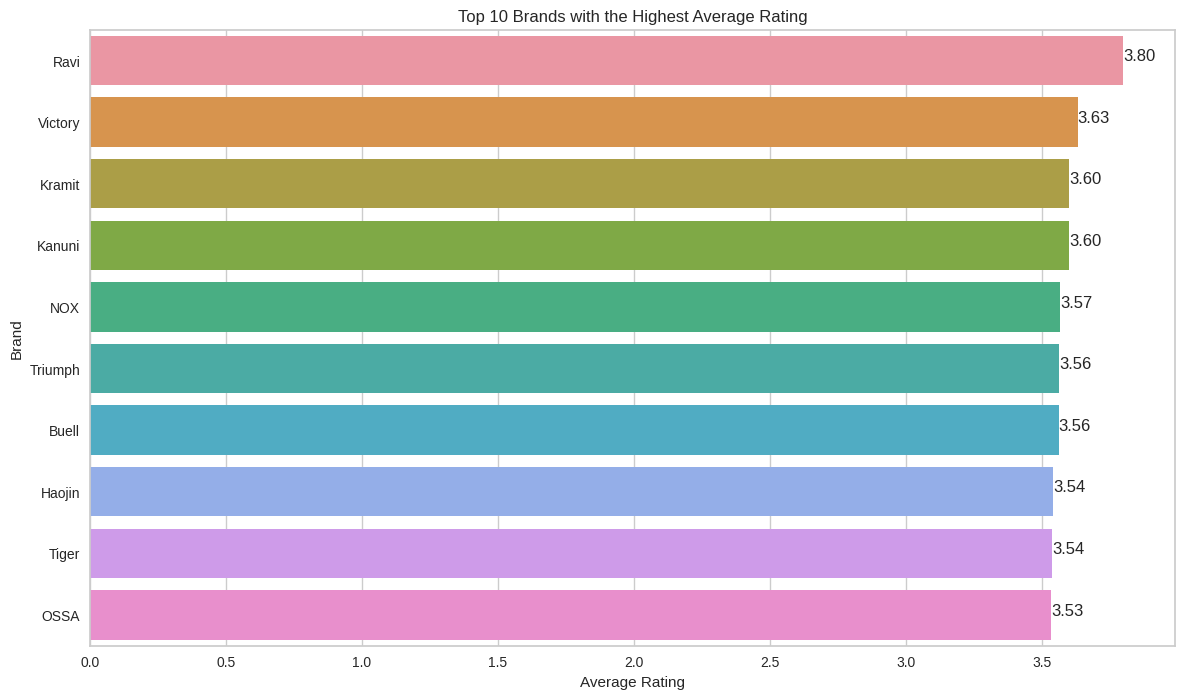

In [653]:
brand_rating = pd.DataFrame({'Brand': rata_rata_per_brand.index, 'Average Rating': rata_rata_per_brand.values})
brand_rating = brand_rating.sort_values(by='Average Rating', ascending=False)
top_10 = brand_rating.head(10)
plt.figure(figsize=(14, 8))
sns.barplot(x='Average Rating', y='Brand', data= top_10.head(10), label='Average Rating')
for index, value in enumerate(top_10['Average Rating']):
    plt.text(value, index, f'{value:.2f}')

plt.title('Top 10 Brands with the Highest Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Brand')
plt.show()


b. Tunjukkan tren power/kekuatan berdasarkan keluaran tahun motor?


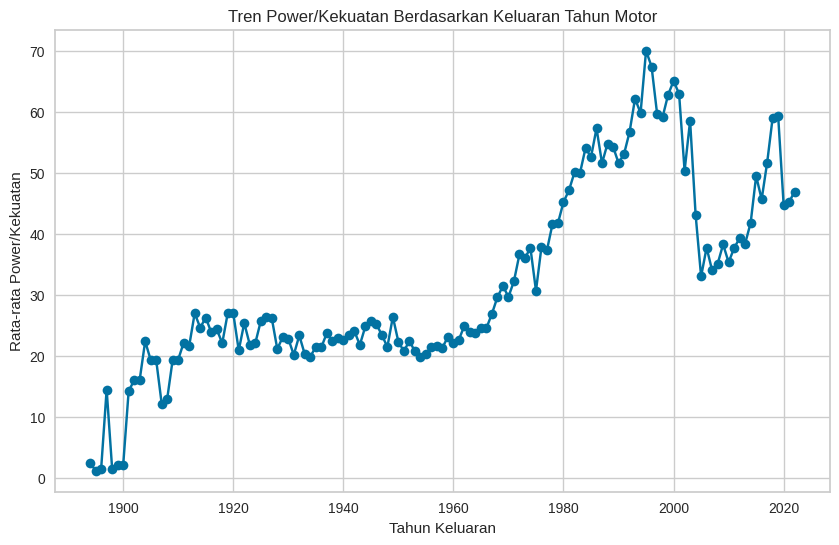

In [654]:
tren_power = df.groupby("Tahun")["Power"].mean()

plt.figure(figsize=(10, 6))
plt.plot(tren_power.index, tren_power.values, marker='o', linestyle='-')
plt.title('Tren Power/Kekuatan Berdasarkan Keluaran Tahun Motor')
plt.xlabel('Tahun Keluaran')
plt.ylabel('Rata-rata Power/Kekuatan')
plt.grid(True)
plt.show()


c. Kategori motor apa yang paling banyak diproduksi di setiap tahunnya?


In [655]:
kategori_paling_banyak_diproduksi = df.groupby(['Tahun', 'Kategori']).size()
kategori_paling_banyak_diproduksi = kategori_paling_banyak_diproduksi.loc[kategori_paling_banyak_diproduksi.groupby('Tahun').idxmax()]
print(kategori_paling_banyak_diproduksi.reset_index()[['Tahun', 'Kategori']])

     Tahun Kategori
0     1894  Classic
1     1895  Classic
2     1896  Classic
3     1897  Classic
4     1898  Classic
..     ...      ...
124   2018  Classic
125   2019  Classic
126   2020  Classic
127   2021  Classic
128   2022  Classic

[129 rows x 2 columns]


d. Apa model motor scooter dengan rating terbaik yang diproduksi oleh lima brand teratas yang memproduksi motor paling banyak?

In [656]:
lima_brand_teratas = df['Model'].apply(lambda x: x.split()[0]).value_counts().nlargest(5).index
filtered_df = df[df['Model'].apply(lambda x: x.split()[0] in lima_brand_teratas)]
scooter_dengan_rating_terbaik = filtered_df[filtered_df['Model'].str.contains('Scooter')].groupby('Model')['Rating'].max()
print(scooter_dengan_rating_terbaik.reset_index())

                               Model  Rating
0  Harley-Davidson AH Topper-Scooter     3.5
1                 Honda BeAT Scooter     3.9


**Eksplorasi Mandiri**

e. Apa jenis sistem pendingin yang paling umum digunakan untuk masing-masing kategori motor?

In [657]:
jenis_sistem_pendingin = df.groupby('Kategori')['Jenis Sistem Pendingin'].agg(pd.Series.mode)

print("Jenis sistem pendingin yang paling umum digunakan untuk masing-masing kategori motor:")
print(jenis_sistem_pendingin)

Jenis sistem pendingin yang paling umum digunakan untuk masing-masing kategori motor:
Kategori
Classic       Air
Cruiser       Air
Offroad    Liquid
Sport         Air
Touring       Air
Name: Jenis Sistem Pendingin, dtype: object


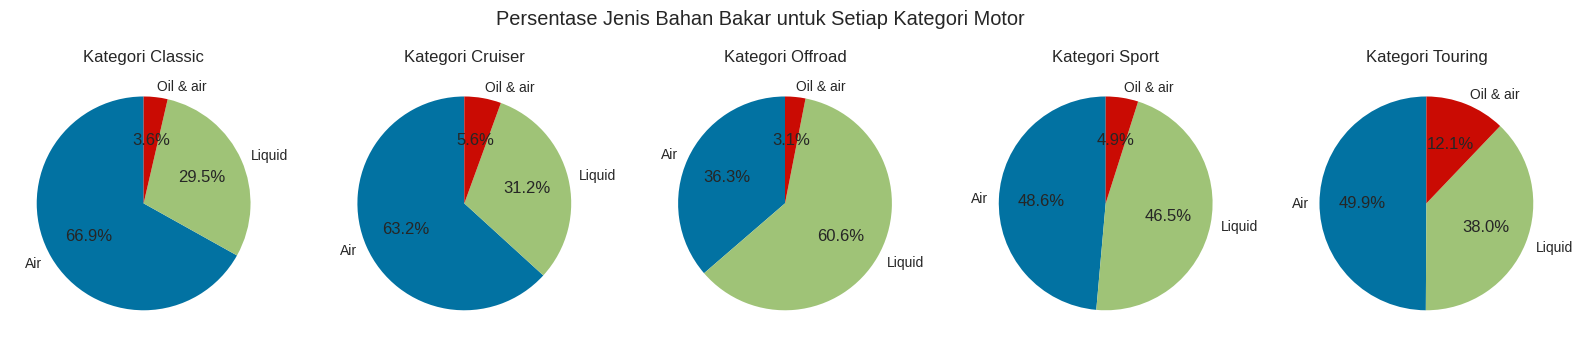

In [658]:
data = df.groupby(['Kategori', 'Jenis Sistem Pendingin']).size().unstack().reset_index()
persentase_jenis_sistem_pendingin = data.set_index('Kategori').div(data.set_index('Kategori').sum(axis=1), axis=0) * 100
persentase_jenis_sistem_pendingin = persentase_jenis_sistem_pendingin.reset_index()
jenis_sistem_pendingin = data.columns[1:]
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4), sharey=True)
for i, (kategori, data) in enumerate(persentase_jenis_sistem_pendingin.groupby('Kategori')):
    ax = axes[i]
    data = data.dropna(subset=jenis_sistem_pendingin)
    if not data.empty:
        ax.pie(data[jenis_sistem_pendingin].iloc[0], labels=jenis_sistem_pendingin, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'Kategori {kategori}')

plt.suptitle('Persentase Jenis Bahan Bakar untuk Setiap Kategori Motor')
plt.show()


:f. Tunjukkan rata-rata kapasitas mesin untuk setiap jenis mesin dan urutkan dari yang terbesar hingga terkecil.

In [659]:
rata_rata_kapasitas = df.groupby('Jenis Mesin')['Kapasitas Mesin'].mean().reset_index()
urutan_rata_rata = rata_rata_kapasitas.sort_values(by='Kapasitas Mesin', ascending=False)

print(urutan_rata_rata)

                         Jenis Mesin  Kapasitas Mesin
28                   V8, four-stroke      5952.877612
16   Six cylinder boxer, four-stroke      1773.735849
27                   V6, four-stroke      1329.272727
8           In-line six, four-stroke      1321.624324
22                   V2, four-stroke      1125.752853
3   Four cylinder boxer, four-stroke      1080.121212
25                   V4, four-stroke      1054.483090
10        In-line three, four-stroke       958.931006
21    Two cylinder boxer, two-stroke       934.677419
17              Square four cylinder       931.000000
6          In-line four, four-stroke       893.081770
20   Two cylinder boxer, four-stroke       803.694888
0                             Diesel       763.379310
1                   Dual disk Wankel       690.250000
18                 Twin, four-stroke       610.977758
23                    V2, two-stroke       570.007143
4    Four cylinder boxer, two-stroke       550.000000
26                    V4, tw

2. Buatlah beberapa model yang mungkin akan diperlukan, di antaranya: (dapat ditambah analisis lain yang menurut kelompok Anda akan bermanfaat)


a. Buatlah model untuk mengklasifikasi Kategori suatu motor.

In [660]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score


def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [661]:
def classification_metrics(prediction, y_test):
  accuracy = accuracy_score(y_test, prediction)
  f1 = f1_score(y_test, prediction, average="macro")
  recall = recall_score(y_test, prediction, average="macro")
  precision = precision_score(y_test, prediction, average="macro")

  print('Accuracy: ' + str(accuracy))
  print('F1 Score: ' + str(f1))
  print('Recall Score: ' + str(recall))
  print('Precision Score: ' + str(precision))

In [662]:
# https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af
def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

PreProcessing

random forest

In [663]:
motor = df.drop(['Brand'], axis=1)

motor_klasifikasi = motor.drop(['Kapasitas Mesin'], axis=1)

In [664]:
# mengecek nilai null
def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])

In [665]:
check_null(motor)

Tidak ditemukan missing value pada dataset


In [666]:
check_null(df_test)

Tidak ditemukan missing value pada dataset


In [667]:
print("Jumlah duplikasi data : " + str(motor.duplicated().sum()))

Jumlah duplikasi data : 0


In [668]:
print("Jumlah duplikasi data : " + str(df_test.duplicated().sum()))

Jumlah duplikasi data : 0


In [669]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

In [670]:
outliers = dict(check_outlier(motor).sum())

Outlier pada tiap atribut:
Ban Belakang                  0
Ban Depan                     0
Bore                          6
Gearbox                       0
ID                            0
Jarak Sumbu Roda           4170
Jenis Bahan Bakar             0
Jenis Mesin                   0
Jenis Sistem Pendingin        0
Jenis Transmisi               0
Kapasitas Bahan Bakar       213
Kapasitas Mesin             626
Kategori                      0
Ketinggian Tempat Duduk    8748
Kompresi                      0
Model                         0
Power                      3340
Rating                     9659
Rem Belakang                  0
Rem Depan                     0
Starter                       0
Stroke                     2611
Suspensi Belakang             0
Suspensi Depan                0
Tahun                      3382
Warna                         0
dtype: int64


<ipython-input-669-0cc1ae9f8111>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-669-0cc1ae9f8111>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-669-0cc1ae9f8111>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < lower_limit) | (df > upper_limit)


In [671]:
def cek_outlier(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR

  return IQR, lower, upper

In [672]:
def handle_outlier_mean(df, col):
  mean =  df.loc[:, col].mean()
  df[col] = np.where(df[col] > cek_outlier(df, col)[2], mean,
                     np.where(df[col] < cek_outlier(df, col)[1], mean, df[col]))

In [673]:
def handle_outlier_median(df, col):
  median = df.loc[:, col].median()
  df[col] = np.where(df[col] > cek_outlier(df, col)[2], median,
                     np.where(df[col] < cek_outlier(df, col)[1], median, df[col]))

In [674]:
columns_obj = ['Model', 'Jenis Mesin','Jenis Bahan Bakar','Jenis Sistem Pendingin','Gearbox','Jenis Transmisi','Suspensi Depan',
               'Suspensi Belakang','Kompresi','Ban Depan','Ban Belakang','Rem Depan','Rem Belakang','Warna','Starter']
from sklearn.preprocessing import LabelEncoder
columns_to_encode = [column for column in motor_klasifikasi.columns if column in columns_obj ]
encoder = LabelEncoder()
for col in columns_to_encode :
  motor_klasifikasi[col] = encoder.fit_transform(motor_klasifikasi[col])

motor_klasifikasi

,ID,Model,Tahun,Rating,Power,Kapasitas Bahan Bakar,Jarak Sumbu Roda,Ketinggian Tempat Duduk,Bore,Stroke,...,Suspensi Depan,Suspensi Belakang,Kompresi,Ban Depan,Ban Belakang,Rem Depan,Rem Belakang,Warna,Starter,Kategori
0,345,165,2012,2.2,9.4,5.00,1400.0,800.0,54.0,66.0,...,2958,1739,105,757,1016,857,27,5930,0,Classic
1,35956,15075,1997,3.7,48.0,17.00,1400.0,690.0,54.0,66.0,...,2958,1739,105,317,625,940,148,263,0,Classic
2,23521,9691,2011,3.0,27.0,4.30,1400.0,800.0,50.0,49.5,...,2891,3472,100,317,625,857,27,1630,2,Classic
3,32412,13561,1956,3.5,27.0,17.00,1400.0,800.0,54.0,66.0,...,2891,2516,105,317,625,857,27,263,0,Classic
4,31061,12886,2007,2.8,27.0,4.80,1220.0,800.0,54.0,66.0,...,2958,1739,105,317,625,940,27,582,1,Classic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29961,27123,11365,2016,3.5,27.0,12.00,1350.0,800.0,52.0,58.6,...,1784,1706,105,58,292,940,148,5676,0,Sport
29962,36003,15095,2016,3.5,27.0,12.11,1570.0,765.0,85.0,83.0,...,2958,842,100,93,473,1755,1296,2550,0,Cruiser
29963,27744,11658,2020,3.5,24.1,16.00,2010.0,800.0,54.0,66.0,...,2958,1739,105,714,102,940,148,1400,0,Sport
29964,8380,3623,2020,3.5,14.8,6.30,1425.0,980.0,58.0,47.0,...,316,2803,21,58,258,1344,742,7639,0,Offroad


In [675]:
unique_kategoris = df['Kategori'].unique()
unique_kategoris

array(['Classic', 'Cruiser', 'Offroad', 'Sport', 'Touring'], dtype=object)

In [676]:
kategori_map = {'Classic': 1, 'Cruiser': 2, 'Offroad': 3, 'Sport': 4, 'Touring': 5}
motor_klasifikasi['Kategori'] = motor_klasifikasi['Kategori'].map(kategori_map)

In [677]:
columns_obj = ['Model', 'Jenis Mesin','Jenis Bahan Bakar','Jenis Sistem Pendingin','Gearbox','Jenis Transmisi','Suspensi Depan',
               'Suspensi Belakang','Kompresi','Ban Depan','Ban Belakang','Rem Depan','Rem Belakang','Warna','Starter']
from sklearn.preprocessing import LabelEncoder
columns_to_encode = [column for column in df_test.columns if column in columns_obj ]
encoder = LabelEncoder()
for col in columns_to_encode :
  df_test[col] = encoder.fit_transform(df_test[col])

df_test

,ID,Model,Tahun,Rating,Power,Kapasitas Bahan Bakar,Jarak Sumbu Roda,Ketinggian Tempat Duduk,Bore,Stroke,...,Jenis Transmisi,Suspensi Depan,Suspensi Belakang,Kompresi,Ban Depan,Ban Belakang,Rem Depan,Rem Belakang,Warna,Starter
0,36475,5612,2018,3.0,27.0,18.55,1689,691,100.0,83.0,...,0,218,162,96,260,314,317,433,972,0
1,31086,4767,2022,3.5,3.0,6.20,1290,800,54.0,66.0,...,0,1393,1333,96,77,78,475,11,1073,0
2,19409,2986,2022,3.5,197.1,19.00,1455,831,76.0,55.0,...,1,1291,1859,12,192,388,202,158,1430,0
3,13494,2120,2014,3.5,27.0,14.76,1267,856,86.5,71.5,...,2,813,1617,100,379,483,317,11,1843,0
4,6320,970,2016,3.5,12.4,9.60,1382,740,54.0,66.0,...,0,1387,1495,96,162,114,475,71,91,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7487,33192,5105,2006,3.6,40.0,19.00,1400,785,78.0,78.0,...,2,976,624,87,192,349,475,50,2665,1
7488,25660,3900,2016,3.6,16.1,7.00,1365,800,54.0,66.0,...,0,1421,835,96,147,113,507,97,2700,0
7489,12773,2007,2017,3.4,85.8,17.30,1450,810,67.0,46.0,...,1,197,1393,14,192,349,414,588,1351,0
7490,15206,2376,2003,3.9,60.0,23.00,1400,860,81.0,72.0,...,1,1421,835,96,579,205,2,71,91,0


In [678]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7492 entries, 0 to 7491
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       7492 non-null   int64  
 1   Model                    7492 non-null   int64  
 2   Tahun                    7492 non-null   int64  
 3   Rating                   7492 non-null   float64
 4   Power                    7492 non-null   float64
 5   Kapasitas Bahan Bakar    7492 non-null   float64
 6   Jarak Sumbu Roda         7492 non-null   int64  
 7   Ketinggian Tempat Duduk  7492 non-null   int64  
 8   Bore                     7492 non-null   float64
 9   Stroke                   7492 non-null   float64
 10  Jenis Mesin              7492 non-null   int64  
 11  Jenis Bahan Bakar        7492 non-null   int64  
 12  Jenis Sistem Pendingin   7492 non-null   int64  
 13  Gearbox                  7492 non-null   int64  
 14  Jenis Transmisi         

In [679]:
motor_klasifikasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29966 entries, 0 to 29965
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       29966 non-null  int64  
 1   Model                    29966 non-null  int64  
 2   Tahun                    29966 non-null  int64  
 3   Rating                   29966 non-null  float64
 4   Power                    29966 non-null  float64
 5   Kapasitas Bahan Bakar    29966 non-null  float64
 6   Jarak Sumbu Roda         29966 non-null  float64
 7   Ketinggian Tempat Duduk  29966 non-null  float64
 8   Bore                     29966 non-null  float64
 9   Stroke                   29966 non-null  float64
 10  Jenis Mesin              29966 non-null  int64  
 11  Jenis Bahan Bakar        29966 non-null  int64  
 12  Jenis Sistem Pendingin   29966 non-null  int64  
 13  Gearbox                  29966 non-null  int64  
 14  Jenis Transmisi       

In [680]:
x_motor = motor_klasifikasi.drop(columns=['Kategori'])
y_motor = motor_klasifikasi['Kategori']

In [681]:
x_train_motor, x_test_motor, y_train_motor, y_test_motor = train_test_split(x_motor, y_motor, test_size = 0.2, random_state = 42)

In [682]:
# Grid Search untuk Random Forest Classifier
rf_classifier = RandomForestClassifier(max_depth=30, random_state=42)
rf_classifier.fit(x_train_motor, y_train_motor)

RandomForestClassifier(max_depth=30, random_state=42)

In [683]:
predicted = rf_classifier.predict(x_test_motor)
classification_metrics(predicted, y_test_motor)

Accuracy: 0.8762095428762096
F1 Score: 0.8390710564817067
Recall Score: 0.8235919918453529
Precision Score: 0.8576587137918261


naive bayes

In [684]:
x_train_motor, x_test_motor, y_train_motor, y_test_motor = train_test_split(x_motor, y_motor, test_size = 0.2, stratify=y_motor,random_state = 123)

In [685]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.model_selection import train_test_split, KFold, cross_val_score
discrete_cols   = ['Model', 'Jenis Mesin','Jenis Bahan Bakar','Jenis Sistem Pendingin','Gearbox','Jenis Transmisi',
                   'Suspensi Depan', 'Suspensi Belakang','Kompresi','Ban Depan','Ban Belakang','Rem Depan','Rem Belakang','Warna','Starter']
continuous_cols = [col for col in motor_klasifikasi.columns if col not in discrete_cols and col != 'Kategori']

X_train_continuous = x_train_motor[continuous_cols]
X_train_discrete   = x_train_motor[discrete_cols]

X_test_continuous = x_test_motor[continuous_cols]
X_test_discrete   = x_test_motor[discrete_cols]

In [686]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_continuous)
X_test_scaled = scaler.transform(X_test_continuous)

In [687]:
model_gnb = GaussianNB() # For numeric
model_gnb.fit(X_train_scaled, y_train_motor)

GaussianNB()

In [688]:
model_mnb = CategoricalNB() # For categorical
model_mnb.fit(X_train_discrete, y_train_motor)

CategoricalNB()

In [689]:
categorical_posteriors = model_mnb.predict_proba(X_test_discrete)
numerical_posteriors   = model_gnb.predict_proba(X_test_scaled)

combined_probabilities = categorical_posteriors * numerical_posteriors

# Get the class with the highest combined probability as the final prediction
final_predictions = np.argmax(combined_probabilities, axis=1)
final_predictions

array([2, 3, 0, ..., 1, 3, 3])

In [690]:
evaluate_classifier_performance(final_predictions, y_test_motor)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.05      0.01      0.02      2392
           2       0.01      0.02      0.01       666
           3       0.04      0.03      0.04      1560
           4       0.05      0.01      0.01      1125
           5       0.00      0.00      0.00       251

    accuracy                           0.02      5994
   macro avg       0.02      0.01      0.01      5994
weighted avg       0.04      0.02      0.02      5994



Confusion Matrix



prediction,0,1,2,3,4
actual,,,,,
1,1976,29,56,320,11
2,151,474,11,20,10
3,202,4,1293,50,11
4,297,19,54,748,7
5,44,58,4,42,103




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.01618284951618285
F1 Macro Average: 0.012931990552449271
F1 Micro Average: 0.01618284951618285
Precision Macro Average: 0.02484726584098024
Precision Micro Average: 0.01618284951618285
Recall Macro Average: 0.01115229443490313
Recall Micro Average: 0.01618284951618285



knn

In [691]:
knn_kfold = KFold(n_splits=7, shuffle=True, random_state=42)

In [692]:
tunned_params = [{'n_neighbors': [1,2,3,4,5,6,7,8],'metric': ['minkowski', 'euclidean', 'manhattan', 'jaccard']}]
model_knn = KNeighborsClassifier()

print("Tuning hyper-parameters model KNN")
best_knn = GridSearchCV(
    model_knn,
    tunned_params,
    scoring="accuracy",
    cv=knn_kfold,
    verbose = 3
)

best_knn.fit(X_train_scaled, y_train_motor)

Tuning hyper-parameters model KNN
Fitting 7 folds for each of 32 candidates, totalling 224 fits
[CV 1/7] END ...metric=minkowski, n_neighbors=1;, score=0.761 total time=   0.3s
[CV 2/7] END ...metric=minkowski, n_neighbors=1;, score=0.775 total time=   0.3s
[CV 3/7] END ...metric=minkowski, n_neighbors=1;, score=0.765 total time=   0.3s
[CV 4/7] END ...metric=minkowski, n_neighbors=1;, score=0.778 total time=   0.3s
[CV 5/7] END ...metric=minkowski, n_neighbors=1;, score=0.777 total time=   0.3s
[CV 6/7] END ...metric=minkowski, n_neighbors=1;, score=0.774 total time=   0.3s
[CV 7/7] END ...metric=minkowski, n_neighbors=1;, score=0.773 total time=   0.3s
[CV 1/7] END ...metric=minkowski, n_neighbors=2;, score=0.746 total time=   0.3s
[CV 2/7] END ...metric=minkowski, n_neighbors=2;, score=0.759 total time=   0.3s
[CV 3/7] END ...metric=minkowski, n_neighbors=2;, score=0.749 total time=   0.3s
[CV 4/7] END ...metric=minkowski, n_neighbors=2;, score=0.753 total time=   0.3s
[CV 5/7] END 

GridSearchCV(cv=KFold(n_splits=7, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['minkowski', 'euclidean', 'manhattan',
                                     'jaccard'],
                          'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]}],
             scoring='accuracy', verbose=3)

In [693]:
print("Best parameters set found on development set:")
print(best_knn.best_params_)

Best parameters set found on development set:
{'metric': 'manhattan', 'n_neighbors': 1}


In [694]:
best_knn_model = KNeighborsClassifier(**best_knn.best_params_)

In [695]:
scores_knn = cross_val_score(best_knn_model, X_train_scaled, y_train_motor, scoring='accuracy', cv=knn_kfold)
print(f'Hasil Evaluasi cross validation:{scores_knn.mean()}')

Hasil Evaluasi cross validation:0.8009347256195609


In [696]:
best_knn_model.fit(X_train_scaled, y_train_motor)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [697]:
print("Detailed classification report:")
y_true, y_pred = y_test_motor, best_knn_model.predict(X_test_scaled)
evaluate_classifier_performance(y_pred, y_true)

Detailed classification report:
Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           1       0.82      0.83      0.83      2392
           2       0.81      0.78      0.79       666
           3       0.88      0.87      0.88      1560
           4       0.75      0.75      0.75      1125
           5       0.56      0.60      0.58       251

    accuracy                           0.81      5994
   macro avg       0.76      0.77      0.76      5994
weighted avg       0.81      0.81      0.81      5994



Confusion Matrix



prediction,1,2,3,4,5
actual,,,,,
1,1991,54,110,198,39
2,66,518,15,28,39
3,133,15,1357,43,12
4,192,16,46,841,30
5,38,40,10,12,151




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.8104771438104772
F1 Macro Average: 0.7644210299012963
F1 Micro Average: 0.8104771438104772
Precision Macro Average: 0.7634781324249555
Precision Micro Average: 0.8104771438104772
Recall Macro Average: 0.7658313226469817
Recall Micro Average: 0.8104771438104772



In [698]:
df_test['Kategori'] = rf_classifier.predict(df_test)
df_test

,ID,Model,Tahun,Rating,Power,Kapasitas Bahan Bakar,Jarak Sumbu Roda,Ketinggian Tempat Duduk,Bore,Stroke,...,Suspensi Depan,Suspensi Belakang,Kompresi,Ban Depan,Ban Belakang,Rem Depan,Rem Belakang,Warna,Starter,Kategori
0,36475,5612,2018,3.0,27.0,18.55,1689,691,100.0,83.0,...,218,162,96,260,314,317,433,972,0,2
1,31086,4767,2022,3.5,3.0,6.20,1290,800,54.0,66.0,...,1393,1333,96,77,78,475,11,1073,0,1
2,19409,2986,2022,3.5,197.1,19.00,1455,831,76.0,55.0,...,1291,1859,12,192,388,202,158,1430,0,4
3,13494,2120,2014,3.5,27.0,14.76,1267,856,86.5,71.5,...,813,1617,100,379,483,317,11,1843,0,3
4,6320,970,2016,3.5,12.4,9.60,1382,740,54.0,66.0,...,1387,1495,96,162,114,475,71,91,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7487,33192,5105,2006,3.6,40.0,19.00,1400,785,78.0,78.0,...,976,624,87,192,349,475,50,2665,1,1
7488,25660,3900,2016,3.6,16.1,7.00,1365,800,54.0,66.0,...,1421,835,96,147,113,507,97,2700,0,1
7489,12773,2007,2017,3.4,85.8,17.30,1450,810,67.0,46.0,...,197,1393,14,192,349,414,588,1351,0,1
7490,15206,2376,2003,3.9,60.0,23.00,1400,860,81.0,72.0,...,1421,835,96,579,205,2,71,91,0,3


In [699]:
kategori_mapping = {
    1: 'Classic',
    2: 'Cruiser',
    3: 'Offroad',
    4: 'Sport',
    5: 'Touring'
}

df_test['Kategori'] = df_test['Kategori'].replace(kategori_mapping)

In [700]:
df_test[['ID', 'Kategori']].to_csv('klasifikasi.csv', index=False)

from google.colab import files
files.download('klasifikasi.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

b.  Buatlah model untuk memprediksi nilai kapasitas mesin dari suatu motor

Random Forest

In [705]:
motor_regresi = motor.drop(['Kategori'], axis=1)

In [706]:
columns_obj = ['Model', 'Jenis Mesin','Jenis Bahan Bakar','Jenis Sistem Pendingin','Gearbox','Jenis Transmisi','Suspensi Depan',
               'Suspensi Belakang','Kompresi','Ban Depan','Ban Belakang','Rem Depan','Rem Belakang','Warna','Starter']
from sklearn.preprocessing import LabelEncoder
columns_to_encode = [column for column in motor_regresi.columns if column in columns_obj ]
encoder = LabelEncoder()
for col in columns_to_encode :
  motor_regresi[col] = encoder.fit_transform(motor_regresi[col])

motor_regresi

,ID,Model,Tahun,Rating,Power,Kapasitas Bahan Bakar,Jarak Sumbu Roda,Ketinggian Tempat Duduk,Bore,Stroke,...,Suspensi Depan,Suspensi Belakang,Kompresi,Ban Depan,Ban Belakang,Rem Depan,Rem Belakang,Warna,Starter,Kapasitas Mesin
0,345,165,2012,2.2,9.4,5.00,1400.0,800.0,54.0,66.0,...,2958,1739,105,757,1016,857,27,5930,0,124.6
1,35956,15075,1997,3.7,48.0,17.00,1400.0,690.0,54.0,66.0,...,2958,1739,105,317,625,940,148,263,0,660.0
2,23521,9691,2011,3.0,27.0,4.30,1400.0,800.0,50.0,49.5,...,2891,3472,100,317,625,857,27,1630,2,97.2
3,32412,13561,1956,3.5,27.0,17.00,1400.0,800.0,54.0,66.0,...,2891,2516,105,317,625,857,27,263,0,498.0
4,31061,12886,2007,2.8,27.0,4.80,1220.0,800.0,54.0,66.0,...,2958,1739,105,317,625,940,27,582,1,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29961,27123,11365,2016,3.5,27.0,12.00,1350.0,800.0,52.0,58.6,...,1784,1706,105,58,292,940,148,5676,0,125.0
29962,36003,15095,2016,3.5,27.0,12.11,1570.0,765.0,85.0,83.0,...,2958,842,100,93,473,1755,1296,2550,0,950.5
29963,27744,11658,2020,3.5,24.1,16.00,2010.0,800.0,54.0,66.0,...,2958,1739,105,714,102,940,148,1400,0,249.0
29964,8380,3623,2020,3.5,14.8,6.30,1425.0,980.0,58.0,47.0,...,316,2803,21,58,258,1344,742,7639,0,124.2


In [707]:
X = motor_regresi.drop(columns=['Kapasitas Mesin'])
y = motor_regresi['Kapasitas Mesin']

In [708]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [709]:
rf_regression = RandomForestRegressor(max_depth=30, random_state=42)
rf_regression.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, random_state=42)

In [710]:
predicted = rf_regression.predict(X_test)
regression_metrics(predicted, y_test)

MAE: 18.409185386709364
MSE: 5431.799554149976
RMSE: 73.70074324014634
R_squared: 0.9827656807912705


linear regression

In [711]:
def metrics(y_test, y_pred):
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, y_pred)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [712]:
scaler = MinMaxScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns]  = scaler.transform(X_test)

In [713]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)
y_pred

array([1412.46443246,  202.31624608,  563.46878868, ..., 1548.99155958,
        158.73072846,  859.71099746])

In [714]:
 metrics(y_test, y_pred)

MAE: 173.61372892000725
MSE: 89753.32257899917
RMSE: 299.58858886646397
R_squared: 0.715225608760041


lasso regression

In [715]:
lasso_alpha_list = [1, 2, 3, 4, 5]
lasso_model_list = []
for alpha in lasso_alpha_list:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_model_list.append(lasso)


In [716]:
counter = 1
for model in lasso_model_list:
    y_pred = model.predict(X_test)
    print(f'Model Lasso regression ke {counter}')
    metrics(y_test, y_pred)
    print()
    counter += 1

Model Lasso regression ke 1
MAE: 173.9797116966992
MSE: 85677.18413615442
RMSE: 292.70665201897003
R_squared: 0.7281586101277533

Model Lasso regression ke 2
MAE: 177.5317283455533
MSE: 85800.33414297258
RMSE: 292.9169406896306
R_squared: 0.7277678728579215

Model Lasso regression ke 3
MAE: 184.54915117012536
MSE: 90601.90702149122
RMSE: 301.0015066764471
R_squared: 0.7125331723010602

Model Lasso regression ke 4
MAE: 190.3009332209281
MSE: 96476.42907756536
RMSE: 310.6065502811642
R_squared: 0.69389415823145

Model Lasso regression ke 5
MAE: 193.96992476065031
MSE: 101326.40568989543
RMSE: 318.31808885122354
R_squared: 0.6785058795848442



ridge regression

In [717]:
ridge_alpha_list = [10, 12, 14, 16, 18]
ridge_model_list = []
for alpha in ridge_alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_model_list.append(ridge)

In [718]:
counter = 1
for model in ridge_model_list:
    y_pred = model.predict(X_test)
    print(f'Model Ridge regression ke {counter}')
    metrics(y_test, y_pred)
    print()
    counter += 1

Model Ridge regression ke 1
MAE: 175.66299157046512
MSE: 83976.4897382401
RMSE: 289.78697303060414
R_squared: 0.7335546689914791

Model Ridge regression ke 2
MAE: 176.1196527211165
MSE: 83946.54042265273
RMSE: 289.7352937124725
R_squared: 0.7336496938648697

Model Ridge regression ke 3
MAE: 176.57072132852383
MSE: 84031.00391021135
RMSE: 289.8810168158849
R_squared: 0.733381703359779

Model Ridge regression ke 4
MAE: 177.0082743520105
MSE: 84194.45263881523
RMSE: 290.1628036789265
R_squared: 0.7328631040383317

Model Ridge regression ke 5
MAE: 177.4171478058962
MSE: 84413.67667217433
RMSE: 290.540318496718
R_squared: 0.7321675376921382



In [721]:
df_test['Kapasitas Mesin'] = rf_regression.predict(df_test.drop('Kategori', axis=1))
df_test

,ID,Model,Tahun,Rating,Power,Kapasitas Bahan Bakar,Jarak Sumbu Roda,Ketinggian Tempat Duduk,Bore,Stroke,...,Suspensi Belakang,Kompresi,Ban Depan,Ban Belakang,Rem Depan,Rem Belakang,Warna,Starter,Kategori,Kapasitas Mesin
0,36475,5612,2018,3.0,27.0,18.55,1689,691,100.0,83.0,...,162,96,260,314,317,433,972,0,Cruiser,1289.277000
1,31086,4767,2022,3.5,3.0,6.20,1290,800,54.0,66.0,...,1333,96,77,78,475,11,1073,0,Classic,60.054538
2,19409,2986,2022,3.5,197.1,19.00,1455,831,76.0,55.0,...,1859,12,192,388,202,158,1430,0,Sport,1015.929000
3,13494,2120,2014,3.5,27.0,14.76,1267,856,86.5,71.5,...,1617,100,379,483,317,11,1843,0,Offroad,824.488000
4,6320,970,2016,3.5,12.4,9.60,1382,740,54.0,66.0,...,1495,96,162,114,475,71,91,0,Classic,139.820964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7487,33192,5105,2006,3.6,40.0,19.00,1400,785,78.0,78.0,...,624,87,192,349,475,50,2665,1,Classic,523.524000
7488,25660,3900,2016,3.6,16.1,7.00,1365,800,54.0,66.0,...,835,96,147,113,507,97,2700,0,Classic,189.215917
7489,12773,2007,2017,3.4,85.8,17.30,1450,810,67.0,46.0,...,1393,14,192,349,414,588,1351,0,Classic,715.330000
7490,15206,2376,2003,3.9,60.0,23.00,1400,860,81.0,72.0,...,835,96,579,205,2,71,91,0,Offroad,775.973000


In [722]:
df_test[['ID', 'Kapasitas Mesin']].to_csv('regresi.csv', index=False)

from google.colab import files
files.download('regresi.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

c. Lakukan clustering pada dataset, dan berikan analisis dari clustering yang dibuat!

In [731]:
motor = df.drop(['Brand'], axis=1)

In [732]:
columns_obj = ['Model', 'Jenis Mesin','Jenis Bahan Bakar','Jenis Sistem Pendingin','Gearbox','Jenis Transmisi','Suspensi Depan',
               'Suspensi Belakang','Kompresi','Ban Depan','Ban Belakang','Rem Depan','Rem Belakang','Warna','Starter', 'Kategori']
from sklearn.preprocessing import LabelEncoder
columns_to_encode = [column for column in motor.columns if column in columns_obj ]
encoder = LabelEncoder()
for col in columns_to_encode :
  motor[col] = encoder.fit_transform(motor[col])

motor

,ID,Model,Tahun,Rating,Power,Kapasitas Bahan Bakar,Jarak Sumbu Roda,Ketinggian Tempat Duduk,Bore,Stroke,...,Suspensi Belakang,Kompresi,Ban Depan,Ban Belakang,Rem Depan,Rem Belakang,Warna,Starter,Kapasitas Mesin,Kategori
0,345,165,2012,2.2,9.4,5.00,1400.0,800.0,54.0,66.0,...,1739,105,757,1016,857,27,5930,0,124.6,0
1,35956,15075,1997,3.7,48.0,17.00,1400.0,690.0,54.0,66.0,...,1739,105,317,625,940,148,263,0,660.0,0
2,23521,9691,2011,3.0,27.0,4.30,1400.0,800.0,50.0,49.5,...,3472,100,317,625,857,27,1630,2,97.2,0
3,32412,13561,1956,3.5,27.0,17.00,1400.0,800.0,54.0,66.0,...,2516,105,317,625,857,27,263,0,498.0,0
4,31061,12886,2007,2.8,27.0,4.80,1220.0,800.0,54.0,66.0,...,1739,105,317,625,940,27,582,1,100.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29961,27123,11365,2016,3.5,27.0,12.00,1350.0,800.0,52.0,58.6,...,1706,105,58,292,940,148,5676,0,125.0,3
29962,36003,15095,2016,3.5,27.0,12.11,1570.0,765.0,85.0,83.0,...,842,100,93,473,1755,1296,2550,0,950.5,1
29963,27744,11658,2020,3.5,24.1,16.00,2010.0,800.0,54.0,66.0,...,1739,105,714,102,940,148,1400,0,249.0,3
29964,8380,3623,2020,3.5,14.8,6.30,1425.0,980.0,58.0,47.0,...,2803,21,58,258,1344,742,7639,0,124.2,2


In [733]:
Q1 = motor.quantile(0.25)
Q3 = motor.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

outliers = (motor < lower_limit) | (motor > upper_limit)
print ("Outlier setiap atribut:\n")
print(outliers.sum())

Outlier setiap atribut:

ID                             0
Model                          0
Tahun                       3382
Rating                      9659
Power                       3340
Kapasitas Bahan Bakar        213
Jarak Sumbu Roda            4170
Ketinggian Tempat Duduk     8748
Bore                           6
Stroke                      2611
Jenis Mesin                  923
Jenis Bahan Bakar              0
Jenis Sistem Pendingin         0
Gearbox                     5540
Jenis Transmisi             9010
Suspensi Depan                 6
Suspensi Belakang            131
Kompresi                       0
Ban Depan                      0
Ban Belakang                   0
Rem Depan                  10331
Rem Belakang                4982
Warna                          0
Starter                     7355
Kapasitas Mesin              626
Kategori                       0
dtype: int64


In [734]:
motor = motor.apply(lambda x: x.clip(lower=lower_limit[x.name], upper=upper_limit[x.name]))
outliers = dict(check_outlier(motor).sum())

Outlier pada tiap atribut:
ID                         0
Model                      0
Tahun                      0
Rating                     0
Power                      0
Kapasitas Bahan Bakar      0
Jarak Sumbu Roda           0
Ketinggian Tempat Duduk    0
Bore                       0
Stroke                     0
Jenis Mesin                0
Jenis Bahan Bakar          0
Jenis Sistem Pendingin     0
Gearbox                    0
Jenis Transmisi            0
Suspensi Depan             0
Suspensi Belakang          0
Kompresi                   0
Ban Depan                  0
Ban Belakang               0
Rem Depan                  0
Rem Belakang               0
Warna                      0
Starter                    0
Kapasitas Mesin            0
Kategori                   0
dtype: int64


In [735]:
scaler = MinMaxScaler()
cols = [column for column in motor ]
motor[cols] = scaler.fit_transform(motor[cols])
motor

,ID,Model,Tahun,Rating,Power,Kapasitas Bahan Bakar,Jarak Sumbu Roda,Ketinggian Tempat Duduk,Bore,Stroke,...,Suspensi Belakang,Kompresi,Ban Depan,Ban Belakang,Rem Depan,Rem Belakang,Warna,Starter,Kapasitas Mesin,Kategori
0,0.008942,0.010374,0.770115,0.000,0.093142,0.157895,0.440789,0.575,0.375000,0.584350,...,0.404147,0.963303,0.695772,0.790661,0.386494,0.057816,0.751013,0.0,0.055877,0.00
1,0.934673,0.947815,0.425287,1.000,0.488229,0.578947,0.440789,0.000,0.375000,0.584350,...,0.404147,0.963303,0.291360,0.486381,0.625000,0.316916,0.033308,0.0,0.356241,0.00
2,0.611417,0.609305,0.747126,0.000,0.273286,0.133333,0.440789,0.575,0.337963,0.248984,...,0.824421,0.917431,0.291360,0.486381,0.386494,0.057816,0.206434,0.0,0.040505,0.00
3,0.842544,0.852625,0.000000,0.625,0.273286,0.578947,0.440789,0.575,0.375000,0.584350,...,0.592579,0.963303,0.291360,0.486381,0.386494,0.057816,0.033308,0.0,0.265358,0.00
4,0.807424,0.810185,0.655172,0.000,0.273286,0.150877,0.000000,0.575,0.375000,0.584350,...,0.404147,0.963303,0.291360,0.486381,0.625000,0.057816,0.073708,0.0,0.042076,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29961,0.705054,0.714555,0.862069,0.625,0.273286,0.403509,0.309211,0.575,0.356481,0.433943,...,0.396144,0.963303,0.053309,0.227237,0.625000,0.316916,0.718845,0.0,0.056101,0.75
29962,0.935895,0.949073,0.862069,0.625,0.273286,0.407368,0.888158,0.225,0.662037,0.929878,...,0.186613,0.917431,0.085478,0.368093,1.000000,1.000000,0.322948,0.0,0.519215,0.25
29963,0.721197,0.732977,0.954023,0.625,0.243603,0.543860,1.000000,0.575,0.375000,0.584350,...,0.404147,0.963303,0.656250,0.079377,0.625000,0.316916,0.177305,0.0,0.125666,0.75
29964,0.217817,0.227790,0.954023,0.625,0.148414,0.203509,0.506579,1.000,0.412037,0.198171,...,0.662180,0.192661,0.053309,0.200778,1.000000,1.000000,0.967452,0.0,0.055652,0.50


In [736]:
#melakukan clustering based on performanya
X = motor[['Power', 'Bore','Stroke', 'Gearbox','Kompresi','Kapasitas Mesin']]
X

,Power,Bore,Stroke,Gearbox,Kompresi,Kapasitas Mesin
0,0.093142,0.375000,0.584350,0.625,0.963303,0.055877
1,0.488229,0.375000,0.584350,0.375,0.963303,0.356241
2,0.273286,0.337963,0.248984,0.125,0.917431,0.040505
3,0.273286,0.375000,0.584350,0.625,0.963303,0.265358
4,0.273286,0.375000,0.584350,0.625,0.963303,0.042076
...,...,...,...,...,...,...
29961,0.273286,0.356481,0.433943,0.375,0.963303,0.056101
29962,0.273286,0.662037,0.929878,0.375,0.917431,0.519215
29963,0.243603,0.375000,0.584350,0.625,0.963303,0.125666
29964,0.148414,0.412037,0.198171,0.625,0.192661,0.055652


For n_clusters = 2 The average silhouette_coefficient is : 0.3653621068268298
For n_clusters = 3 The average silhouette_coefficient is : 0.3326393996806258
For n_clusters = 4 The average silhouette_coefficient is : 0.36098937693534733
For n_clusters = 5 The average silhouette_coefficient is : 0.3160071774732868
For n_clusters = 6 The average silhouette_coefficient is : 0.3236788873839802
For n_clusters = 7 The average silhouette_coefficient is : 0.3079111359883477
For n_clusters = 8 The average silhouette_coefficient is : 0.2990271512706231


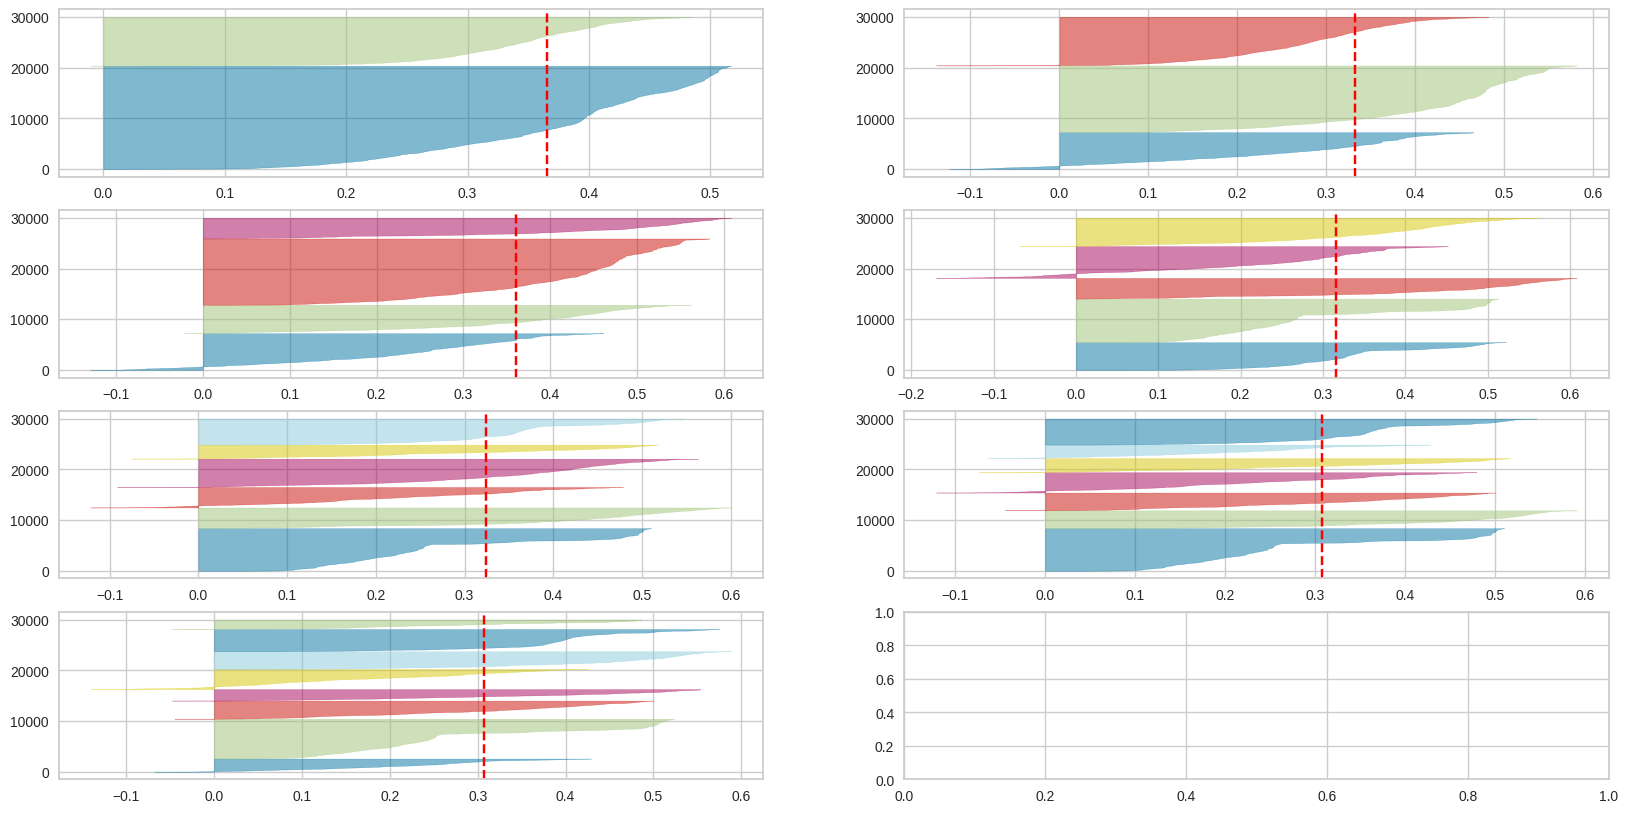

In [737]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
num_of_cluster = [2, 3, 4, 5, 6, 7, 8]

fig, ax = plt.subplots(4, 2, figsize=(20,10))
for k in num_of_cluster:
    # Create KMeans instance for different number of clusters
    clusterer = KMeans(n_clusters = k, n_init=10)

    # Draw silhouette diagram
    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(X)

    # Compute silhoutte score
    # This gives a perspective into the density and separation of the formed clusters
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

In [738]:
kmeans = KMeans(n_clusters=2)
cluster_assignment = kmeans.fit_predict(X)
data_with_clusters = pd.DataFrame(X.copy(), columns=('Power', 'Bore','Stroke', 'Gearbox','Kompresi','Kapasitas Mesin'))
data_with_clusters['Clusters'] = cluster_assignment
data_with_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Power,Bore,Stroke,Gearbox,Kompresi,Kapasitas Mesin,Clusters
0,0.093142,0.375000,0.584350,0.625,0.963303,0.055877,0
1,0.488229,0.375000,0.584350,0.375,0.963303,0.356241,0
2,0.273286,0.337963,0.248984,0.125,0.917431,0.040505,0
3,0.273286,0.375000,0.584350,0.625,0.963303,0.265358,0
4,0.273286,0.375000,0.584350,0.625,0.963303,0.042076,0
...,...,...,...,...,...,...,...
29961,0.273286,0.356481,0.433943,0.375,0.963303,0.056101,0
29962,0.273286,0.662037,0.929878,0.375,0.917431,0.519215,0
29963,0.243603,0.375000,0.584350,0.625,0.963303,0.125666,0
29964,0.148414,0.412037,0.198171,0.625,0.192661,0.055652,1


In [739]:
cluster_stats = data_with_clusters.groupby('Clusters').agg(['mean', 'median', 'std'])
cluster_stats

Power                          Bore                      \
              mean    median       std      mean    median       std   
Clusters                                                               
0         0.323342  0.273286  0.256831  0.477392  0.375000  0.158117   
1         0.519616  0.273286  0.349216  0.558506  0.577778  0.174157   

            Stroke                       Gearbox                  Kompresi  \
              mean    median       std      mean median       std     mean   
Clusters                                                                     
0         0.569465  0.584350  0.243514  0.541169  0.625  0.269903  0.93083   
1         0.472121  0.462398  0.246638  0.618863  0.625  0.200104  0.12664   

                             Kapasitas Mesin                      
            median       std            mean    median       std  
Clusters                                                          
0         0.963303  0.077230        0.257836  0.126171  0.267415  
1         0.110092  0.098172        0.331574  0.322020  0.254822

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data_with_clusters, hue='Clusters', diag_kind='kde', palette='viridis')
plt.suptitle('Pair Plot of Clustered Data', y=1.02)
plt.show()
